<a href="#"><img src="https://github.com/matheusbuniotto/portifolio/blob/main/logo_vertical.png?raw=true" width='210px' alt="logo" border="0"></a>

#### **Data Science na Prática**
#### **Projeto - Análise de Dados - Covid-19**
*por Matheus Buniotto*


# Analisando os dados - Covid-19

<a href="#"><img src="https://dl.dropboxusercontent.com/s/pbo9motfz327g0w/Projeto-Covid.jpg?dl=0" width='100%' alt="banner" border="0"></a>




Há mais de um ano o mundo registrava o primeiro caso de Covid-19 na cidade de  Wuhan, epicentro da doença na China. Hoje, mais de 2,3 milhões de pessoas morreram em todo o mundo e mais de 108 milhões foram infectadas.

A COVID-19 é uma doença causada pelo coronavírus, que apresenta um espectro clínico variando de infecções assintomáticas a quadros graves, que podem levar à morte. De acordo com a OMS (Organização Mundial da Saúde), cerca de 80% dos pacientes infectados com a COVID-19 podem ser assintomáticos ou apresentar sintomas leves, e aproximadamente 20% dos casos detectados irão precisar atendimento hospitalar por devido à dificuldade respiratória, dos quais aproximadamente 5% podem necessitar de suporte ventilatório.

No dia 5 de dezembro, a Rússia, se tornou o primeiro país a iniciar a vacinação de seus cidadãos contra a Covid-19. Alguns dias depois, o Reino Unido começou o processo de vacinação, dessa vez com o imunizante da Pfizer/BioNTech. Os EUA e o Canadá aplicaram a sua primeira vacina no dia 14 de dezembro(14). 

Nessa análise vamos entender qual o cenário atual da Covid-19 no Brasil e no mundo.

### Obtenção dos dados

Os dados utilizados nessa análise são disponibilizados pelo portal [Our World in Data](https://ourworldindata.org/). Our World In Data é uma publicação especializada em pesquisas empíricas e dados sobre mudanças nas condições de vida ao redor do mundo, e tem como objetivo tornar o conhecimento dos grandes problemas globais acessível e compreensível.

O dataset completo pode ser baixado através do repositório: [Covid-19 dataset](https://github.com/owid/covid-19-data/tree/master/public/data)




#### Instalando os pacotes

Antes de tudo, vamos instalar e importar os pacotes que iremos utilizar para realizar a análise dos dados.

In [2]:
!pip install pywaffle -q


     |████████████████████████████████| 532kB 5.5MB/s 


In [3]:
#importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pywaffle import Waffle

%matplotlib inline

Vamos importar nosso dataset direto do repositório atualizado.

In [4]:
#importando os dados
df = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv')

### Dicionário das variáveis:
O dicionário completo das variáveis pode ser encontrado aqui: [Covid-19 Codebook](https://github.com/owid/covid-19-data/blob/master/public/data/owid-covid-codebook.csv)

* `iso_code` : Código do pais
* `continent` : Continente do pais
* `location` : Localização geográfica
* `date` : Data da observação
* `total_cases` : Total de casos confirmados
* `new_cases` : Novos casos confirmados
* `new_cases_smoothed` : Novos casos confirmados (7-dias suavizados)
* `total_deaths` : Total de mortes
* `new_deaths` : Novas mortes confirmads
* `new_deaths_smoothed` : Novas mortes confirmads (7-dias suavizados)
* `total_cases_per_million` : Total de casos por 1.000.000 de pessoas
* `new_cases_per_million`: Novos casos por 1,000,000 de pessoas
*`new_cases_smoothed_per_million` : Novos casos  (7-dias suavizados) por 1.000.000 de pessoas
* `total_deaths_per_million` : Total de mortes atribuídas ao COVID-19 por 1,000,000 de pessoas
* `new_deaths_per_million` : Novas mortes atribuídas ao COVID-19 por 1.000.000 de pessoas
* `reproduction_rate` : Estimativa real da taxa de transmissão da COVID-19 (R). [Ver mais 
](http://trackingr-env.eba-9muars8y.us-east-2.elasticbeanstalk.com/FAQ)
* `icu_patients` : Pacientes na UTI  durante o dia observado
* `icu_patients_per_million`: Pacientes na UTI por 1.000.000 de pessoas
* `hosp_patients` : Pacientes internados durante o dia observado
* `hosp_patients_per_million`: Pacientes internados durante o dia observado por 1.000.000 de pessoas  
* `weekly_icu_admissions` : Quantidade de novas internações em UTIs na semana
* `weekly_icu_admissions_per_million`:Quantidade de novas internações em UTIs na semana por 1.000.000 de pessoas 
* `weekly_hosp_admissions` : Quantidade de novas internações na semana 
* `weekly_hosp_admissions_per_million`: Quantidade de novas internações  na semana por 1.000.000 de pessoas
* `total_tests` : Total de testes realizados
* `new_tests` : Total de novos testes realizados
* `total_tests_per_thousand`:Total de testes por 1000 pessoas 
* `new_tests_per_thousand` : Novos testes por 1000
* `new_tests_smoothed` : Total de testes por 1000 (7-dias suavizados)
* `positive_rate` : Porcentagem de teste positivios nos últimos 7 dias
* `tests_per_case` : Número de testes conduzidos por novos casos confirmados nos últimos 7 dias
* `test_units` : Unidade usada no local
* `total_vaccinations` : Número total de vacinas aplicadas
* `people_vaccinated` : Número total de pessoas que receberam a vacina
* `people_fully_vaccinated` : Número total de pessoas que receberam todas as doses recomendadas da vacina
* `new_vaccinations` : Quantidade de novas vacinas aplicadas
* `total_vaccinations_per_hundred` : Número total de vacinas aplicadas por 100 habitantes
* `people_vaccinated_per_hundred` :Número total de pessoas que receberam a vacina por 100 habitantes 
* `people_fully_vaccinated_per_hundred` : Número total de pessoas que receberam todas as doses recomendadas da vacina por 100 habitantes
* `stringency_index` :  Index de rigidez da resposta governamental de 0 a 100 (100 = maiores restrições)
* `population` : População
* `population_density` : Densidade populacional
* `median_age` : Idade média da população
* `aged_65_older` : Porcentagem da população com mais de 65 anos em 2015
* `aged_70_older` : Porcentagem da população com mais de70 anos em 2015
* `gdp_per_capita` : PBI per capita
* `extreme_poverty` : Porcentagem da população vivendo em extrema pobreza em 2010
* `cardiovasc_death_rate` : Death rate from cardiovascular disease in 2017 (número de mortes no ano por 100.000 de habitantes)
* `diabetes_prevalence` : Porcentagem da população com diabetes em 2017
* `female_smokers` : Porcentagem de mulheres fumantes
* `male_smokers` : Porcentagem de homens fumantes
* `handwashing_facilities` : Porcentagem da população com acesso a locais de higienização das mãos
* `hospital_beds_per_thousand` :  Número de leitos por 1000 habitantes
* `life_expectancy` : Expectativa de vida em 2019
* `human_development_index` : IDH





## Análise Exploratória Inicial


Com os pacotes importados e com nosso dataset carregado, vamos inciar as análises exploratórias e entender melhor nosso conjunto de dados.

Vamos ver quantas entradas e variáveis nosso dataset possui, para isso utilizaremos a função `.shape`

In [5]:
df.shape

print('O conjunto de dados possui:')
print('Entradas: {}'.format(df.shape[0]))
print('Variáveis: {}'.format(df.shape[1]))


O conjunto de dados possui:
Entradas: 68975
Variáveis: 59


Vamos verificar o nome das colunas e o tipo de dados presentes em cada uma delas, dessa forma podemos ver se há alguma discrepância entre os dados e o formato em que estão representados.

In [6]:
#verificar os tipos das colunas
df.dtypes

iso_code                                  object
continent                                 object
location                                  object
date                                      object
total_cases                              float64
new_cases                                float64
new_cases_smoothed                       float64
total_deaths                             float64
new_deaths                               float64
new_deaths_smoothed                      float64
total_cases_per_million                  float64
new_cases_per_million                    float64
new_cases_smoothed_per_million           float64
total_deaths_per_million                 float64
new_deaths_per_million                   float64
new_deaths_smoothed_per_million          float64
reproduction_rate                        float64
icu_patients                             float64
icu_patients_per_million                 float64
hosp_patients                            float64
hosp_patients_per_mi

Utilizando a função `head` vamos visualizar as 5 primeiras entradas do datasete e também usaremos a função `tail` para verificar as últimas.



In [7]:
#verificar as primeiras entradas
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


In [8]:
#verificar as últimas entradas
df.tail()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
68970,ZWE,Africa,Zimbabwe,2021-02-10,34864.0,83.0,128.571,1364.0,11.0,13.571,2345.702,5.584,8.650,91.772,0.740,0.913,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
68971,ZWE,Africa,Zimbabwe,2021-02-11,34864.0,0.0,99.000,1364.0,0.0,10.857,2345.702,0.000,6.661,91.772,0.000,0.730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
68972,ZWE,Africa,Zimbabwe,2021-02-12,35045.0,181.0,102.000,1393.0,29.0,12.857,2357.880,12.178,6.863,93.723,1.951,0.865,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
68973,ZWE,Africa,Zimbabwe,2021-02-13,35104.0,59.0,88.143,1398.0,5.0,11.714,2361.850,3.970,5.930,94.060,0.336,0.788,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
68974,ZWE,Africa,Zimbabwe,2021-02-14,35172.0,68.0,88.571,1400.0,2.0,10.571,2366.425,4.575,5.959,94.194,0.135,0.711,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571


Sabemos que um grande problema nos conjuntos de dados é a qualidade dos dados, além de problemas de formatação, outliers e valores discrepântes, também podemos nos deparar com uma grande quantidade de valores ausentes e/ou nulos. Vamos ver a porcentagem de valores ausentes para cada uma das variáveis.

In [9]:
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

weekly_icu_admissions                    0.990040
weekly_icu_admissions_per_million        0.990040
people_fully_vaccinated                  0.985487
people_fully_vaccinated_per_hundred      0.985487
weekly_hosp_admissions                   0.983530
weekly_hosp_admissions_per_million       0.983530
people_vaccinated                        0.976180
people_vaccinated_per_hundred            0.976180
new_vaccinations                         0.975774
total_vaccinations                       0.971120
total_vaccinations_per_hundred           0.971120
new_vaccinations_smoothed                0.958260
new_vaccinations_smoothed_per_million    0.958260
icu_patients                             0.893918
icu_patients_per_million                 0.893918
hosp_patients                            0.873882
hosp_patients_per_million                0.873882
total_tests                              0.551490
total_tests_per_thousand                 0.551490
new_tests                                0.548605


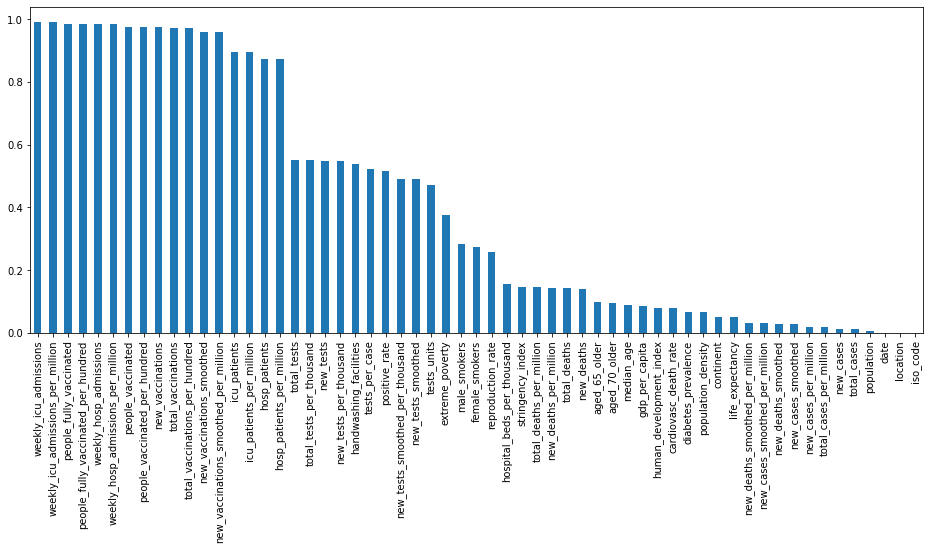

In [10]:
fig, ax = plt.subplots(figsize=(16,6))
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False).plot(kind='bar');

Usando a função `dtypes `vimos que a coluna que representa data não está em um formato referente a datas, vamos fazer essa transformação antes de continuarmos com a análise.




In [11]:
#transformar coluna date para tipo data
df.date = pd.to_datetime(df.date)

Vamos extrair algumas informações estatísticas dos dados para que possamos ter uma primeira visão da distribuição e valores dos dados.

In [12]:
df.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
count,6.814700e+04,68145.000000,67144.000000,5.922200e+04,59380.000000,67144.000000,67773.000000,67771.000000,66775.000000,58861.000000,59019.000000,66775.000000,51295.000000,7317.000000,7317.000000,8699.000000,8699.000000,687.000000,687.000000,1136.000000,1136.000000,3.113500e+04,3.093600e+04,30936.000000,31135.000000,3.518400e+04,35184.000000,33483.000000,32971.000000,1.992000e+03,1.643000e+03,1.001000e+03,1.671000e+03,2.879000e+03,1992.000000,1643.00000,1001.000000,2879.000000,58844.000000,6.859200e+04,64492.000000,62841.000000,62115.000000,62486.000000,62978.000000,43048.000000,63589.000000,64367.000000,50093.000000,49406.000000,31882.000000,58312.000000,65553.000000,63574.000000
mean,5.583701e+05,5062.325644,5085.665685,1.722672e+04,129.873476,113.278454,6513.141708,63.114676,63.203036,158.558857,1.350943,1.177672,1.030927,1000.427771,21.505626,5052.915278,145.820843,269.209789,15.262504,2694.062585,97.291785,3.675888e+04,4.102075e+06,143.010642,1.352734,3.555212e+04,1.300610,0.084978,161.504185,3.157137e+06,2.331046e+06,7.893615e+05,1.826234e+05,1.169735e+05,4.687390,3.89535,1.475085,1978.861410,59.083667,1.323805e+08,323.355187,30.588726,8.819744,5.591547,19141.645818,13.225211,256.819968,7.785542,10.566470,32.649256,51.060452,3.039409,73.139054,0.728349
std,3.956936e+06,32223.999668,32008.967729,9.960826e+04,716.982614,650.062839,13009.865411,165.529698,138.792829,285.265321,3.886077,2.776548,0.363442,2801.099505,24.535869,13907.734483,187.315328,513.892049,29.184172,6078.392718,224.403975,1.458693e+05,1.910934e+07,291.437176,3.471148,1.346900e+05,2.615558,0.098635,832.625088,1.406647e+07,8.575374e+06,2.755142e+06,7.682838e+05,4.984641e+05,10.058266,7.58435,3.968984,3661.293362,22.194572,7.018688e+08,1571.552338,9.119730,6.250143,4.269473,19656.303903,19.901286,118.258154,3.917915,10.414726,13.459833,31.770788,2.469253,7.548877,0.150148
min,1.000000e+00,-46076.000000,-1121.714000,1.000000e+00,-1918.000000,-232.143000,0.001000,-2153.437000,-276.825000,0.001000,-76.445000,-10.921000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.391720e+05,1.000000e+00,0.000000,-6.320000,0.000000e+00,0.000000,0.000000,1.600000,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000,0.00000,0.000000,0.000000,0.000000,8.090000e+02,0.137000,15.100000,1.144000,0.526000,661.240000,0.100000,79.370000,0.990000,0.100000,7.700000,1.188000,0.100000,53.280000,0.394000
25%,6.500000e+02,1.000000,5.429000,3.400000e+01,0.000000,0.000000,125.177000,0.117000,0.931000,5.184000,0.000000,0.000000,0.870000,19.000000,2.988000,75.000000,15.975000,5.006000,1.176000,32.457000,6.890500,1.250000e+03,9.307300e+04,7.495750,0.099000,1.317000e+03,0.099000,0.014000,8.200000,2.611450e+04,2.477300e+04,8.364000e+03,1.862500e+03,1.160000e+03,0.417500,0.43000,0.070000,305.500000,44.440000,2.877800e+06,36.253000,22.200000,3

Vamos entender quais são os 5 paises com maior quantidade de casos e mortes até o presente momento.

In [13]:
#localizar paises com mais casos até o momento
df.loc[(df['continent'].notnull()) & (df.date == '2021-02-09') ].sort_values(by='total_cases', ascending=False)[:5]

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
65756,USA,North America,United States,2021-02-09,27192455.0,95360.0,108128.286,468227.0,3118.0,2844.000,82151.775,288.094,326.669,1414.572,9.420,8.592,NaN,16129.0,48.728,79179.0,239.210,NaN,NaN,NaN,NaN,542197.0,312438896.0,943.917,1.638,1119700.0,3.383,NaN,NaN,tests performed,43206190.0,32867213.0,9840429.0,788573.0,1489333.0,12.92,9.83,2.94,4453.0,NaN,3.310026e+08,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926
28688,IND,Asia,India,2021-02-09,10858371.0,11067.0,11583.857,155252.0,94.0,93.714,7868.360,8.020,8.394,112.501,0.068,0.068,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,687138.0,202587752.0,146.802,0.498,690814.0,0.501,0.017,59.6,samples tested,6611561.0,NaN,NaN,352553.0,353235.0,0.48,NaN,NaN,256.0,NaN,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.280,10.39,1.9,20.6,59.55,0.53,69.66,0.645
9221,BRA,South America,Brazil,2021-02-09,9599565.0,74925.0,45163.857,233520.0,1986.0,1030.143,45161.798,352.490,212.476,1098.611,9.343,4.846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3820207.0,3786591.0,33616.0,214669.0,218237.0,1.80,1.78,0.02,1027.0,NaN,2.125594e+08,25.040,33.5,8.552,5.060,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.20,75.88,0.765
65366,GBR,Europe,United Kingdom,2021-02-09,3983756.0,12441.0,17142.714,114066.0,1052.0,834.429,58683.024,183.263,252.522,1680.258,15.497,12.292,NaN,3164.0,46.608,25621.0,377.412,NaN,NaN,NaN,NaN,579266.0,76297866.0,1123.912,8.533,665047.0,9.797,0.026,38.8,tests performed,13577851.0,13058298.0,519553.0,414973.0,436774.0,20.00,19.24,0.77,6434.0,86.11,6.788600e+07,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932
51382,RUS,Europe,Russia,2021-02-09,3953970.0,14808.0,15975.000,76347.0,519.0,480.714,27094.149,101.470,109.467,523.160,3.556,3.294,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,362505.0,2.484,0.044,22.7,tests performed,NaN,NaN,NaN,NaN,103571.0,NaN,NaN,NaN,710.0,NaN,1.459345e+08,8.823,39.6,14.178,9.393,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824


In [14]:
#localizar paises com mais mortes até o momento
df.loc[(df['continent'].notnull()) & (df.date == '2021-02-09')].sort_values(by='total_deaths', ascending=False)[:5]

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
65756,USA,North America,United States,2021-02-09,27192455.0,95360.0,108128.286,468227.0,3118.0,2844.000,82151.775,288.094,326.669,1414.572,9.420,8.592,NaN,16129.0,48.728,79179.0,239.210,NaN,NaN,NaN,NaN,542197.0,312438896.0,943.917,1.638,1119700.0,3.383,NaN,NaN,tests performed,43206190.0,32867213.0,9840429.0,788573.0,1489333.0,12.92,9.83,2.94,4453.0,NaN,3.310026e+08,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926
9221,BRA,South America,Brazil,2021-02-09,9599565.0,74925.0,45163.857,233520.0,1986.0,1030.143,45161.798,352.490,212.476,1098.611,9.343,4.846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3820207.0,3786591.0,33616.0,214669.0,218237.0,1.80,1.78,0.02,1027.0,NaN,2.125594e+08,25.040,33.5,8.552,5.060,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.20,75.88,0.765
40404,MEX,North America,Mexico,2021-02-09,1946751.0,10738.0,10379.857,168432.0,1701.0,1271.286,15098.964,83.284,80.506,1306.355,13.193,9.860,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20871.0,4566572.0,35.418,0.162,22070.0,0.171,0.330,3.0,people tested,724347.0,640129.0,84218.0,6527.0,6687.0,0.56,0.50,0.07,52.0,NaN,1.289328e+08,66.444,29.3,6.857,4.321,17336.469,2.5,152.783,13.06,6.9,21.4,87.847,1.38,75.05,0.779
28688,IND,Asia,India,2021-02-09,10858371.0,11067.0,11583.857,155252.0,94.0,93.714,7868.360,8.020,8.394,112.501,0.068,0.068,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,687138.0,202587752.0,146.802,0.498,690814.0,0.501,0.017,59.6,samples tested,6611561.0,NaN,NaN,352553.0,353235.0,0.48,NaN,NaN,256.0,NaN,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.280,10.39,1.9,20.6,59.550,0.53,69.66,0.645
65366,GBR,Europe,United Kingdom,2021-02-09,3983756.0,12441.0,17142.714,114066.0,1052.0,834.429,58683.024,183.263,252.522,1680.258,15.497,12.292,NaN,3164.0,46.608,25621.0,377.412,NaN,NaN,NaN,NaN,579266.0,76297866.0,1123.912,8.533,665047.0,9.797,0.026,38.8,tests performed,13577851.0,13058298.0,519553.0,414973.0,436774.0,20.00,19.24,0.77,6434.0,86.11,6.788600e+07,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932




--- 
## Visualização dos Dados




Vamos gerar os gráficos a partir de nossos dados para facilitar a análise de dados. Os gráficos trazem muito mais praticidade, principalmente quando os dados não são discretos, ou seja, quando são números consideravelmente grandes.

No conjunto de dados existem informações agrupadas por continentes, para fazermos uma análise referente aos paises, primeiramente vamos excluir os continentes da nossa seleção de dados.

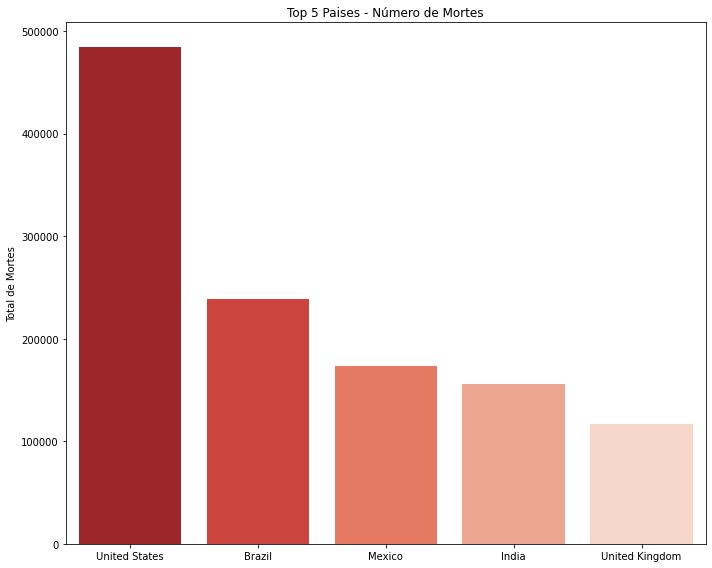

In [15]:
#top 5 
top5_total_deaths = df.loc[(df['continent'].notnull()) & (df.date == '2021-02-13')].sort_values(by='total_deaths', ascending=False)[:5]

#definir figura
fig, ax = plt.subplots(figsize=(10,8))

#dados do gráfico
sns.barplot(x='location', y='total_deaths', data = top5_total_deaths, ax=ax, palette='Reds_r');

#configuração do gráfico
ax.set_title('Top 5 Paises - Número de Mortes')
ax.set_xlabel ('')
ax.set_ylabel('Total de Mortes')

plt.tight_layout()


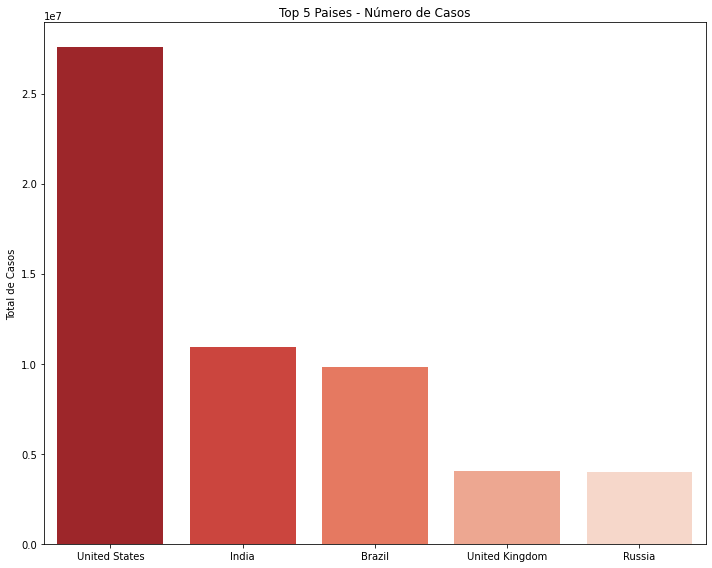

In [16]:
#top 5 
top5_total_cases = df.loc[(df['continent'].notnull()) & (df.date == "2021-02-13")].sort_values(by='total_cases', ascending=False)[:5]

#definir figura
fig, ax = plt.subplots(figsize=(10,8))

#dados do gráfico
sns.barplot(x='location', y='total_cases', data = top5_total_cases, ax=ax, palette='Reds_r');

#configuração do gráfico
ax.set_title('Top 5 Paises - Número de Casos')
ax.set_xlabel ('')
ax.set_ylabel('Total de Casos')

plt.tight_layout()

Criaremos um novo dataset somente com os dados globais, vamos selecionar a localização "mundo" no nosso conjunto de dados..

In [17]:
df_world = df.copy()

df_world = df.loc[df.location == 'World', 'total_deaths'].reset_index(drop=True)


Criaremos um gráfico para entender a evolução da Covid-19 no mundo, analisando a quantidade de casos registrados ao longo das semanas.

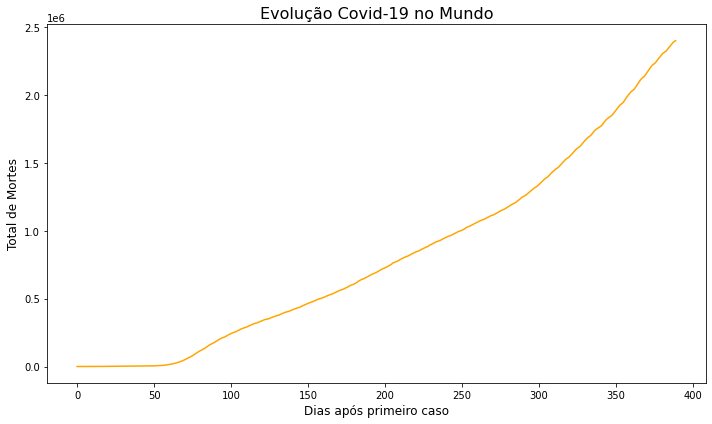

In [18]:
fig, ax = plt.subplots(figsize=(10,6))

#passando data set para o gráfico
sns.lineplot(data=df_world, color = 'orange')

#configuração do gráfico
ax.set_title('Evolução Covid-19 no Mundo', fontsize=16)
ax.set_xlabel ('Dias após primeiro caso', fontsize=12)
ax.set_ylabel('Total de Mortes', fontsize=12)


#plotar
plt.tight_layout()

Vamos enteder se há alguma correlação entre o PIB per capita do país e o número total de mortes por milhão de pessoas.

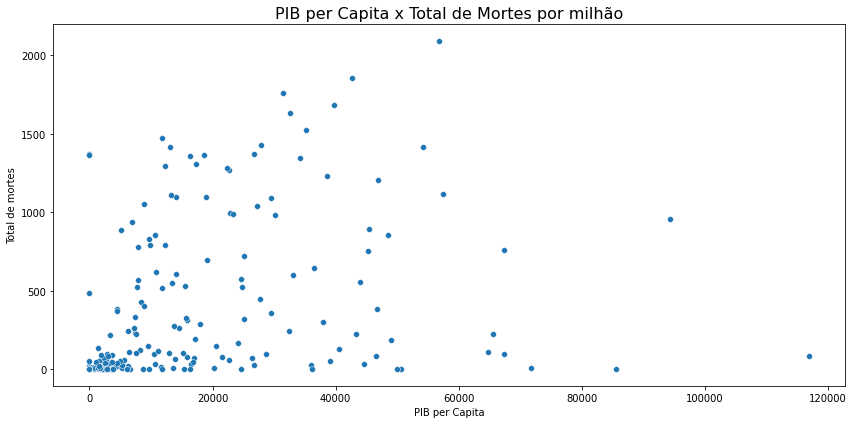

In [19]:
df_gdp = df.loc[(df['continent'].notnull()) & (df.date == '2021-02-09')].groupby(by='iso_code').sum()


fig, ax = plt.subplots(figsize=(12,6))
sns.scatterplot(x='gdp_per_capita', y='total_deaths_per_million', data = df_gdp, s=35)
ax.set_title('PIB per Capita x Total de Mortes por milhão', fontsize=16)
ax.set_xlabel('PIB per Capita')
ax.set_ylabel('Total de mortes')

plt.tight_layout()

Em nosso conjunto de dados há uma variável chamada `stringency_index`, que como vimos em nosso dicionário de dados refere-se ao índice de rigidez nas restrições que foram tomadas naquele país, que varia de 0 a 100 (100 = maiores restrições).


Vamos ver quais foram os 20 países que ao longo do tempo tiveram uma média de maior rigidez nas restrições.

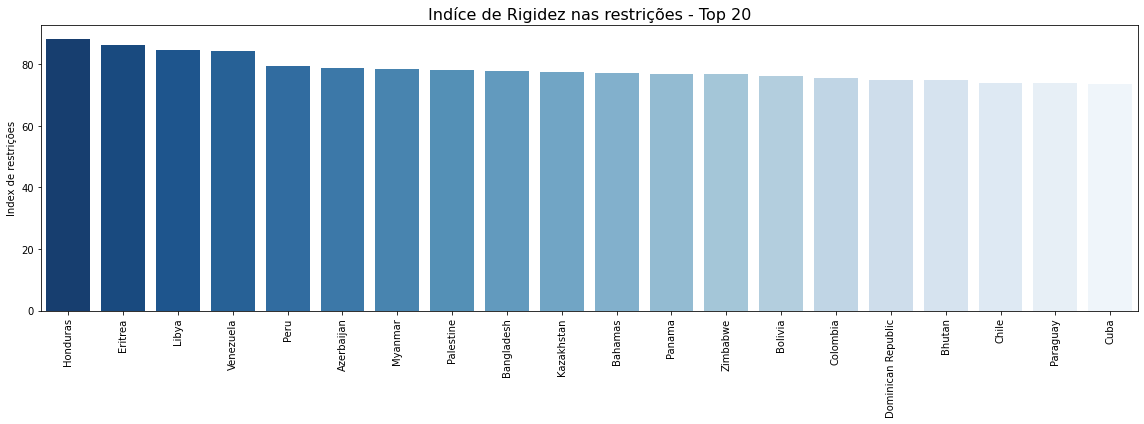

In [20]:
fig, ax = plt.subplots(figsize=(16,6))
string_index_20 = df[['stringency_index', 'location', 'total_deaths_per_million']].groupby(by='location').mean().sort_values(by= 'stringency_index',ascending=False)[:20]

sns.barplot(x=string_index_20.index, y='stringency_index', data = string_index_20, ax=ax, palette='Blues_r')
ax.tick_params(axis='x', labelrotation=90)
ax.set_title ('Indíce de Rigidez nas restrições - Top 20', fontsize=16)
ax.set_ylabel ('Index de restrições')
ax.set_xlabel('')

plt.tight_layout()

Os países que tiveram as maiores restrições tiveram o menor número de mortes por milhão ou talvez tenham tido que ser mais duros nas restrições devido ao grande número de mortes que estavam ocorrendo em seus territórios. Vamos análisa a distribuição de mortes por milhão, rigidez nas restrições e também incluiremos a idade média da população.

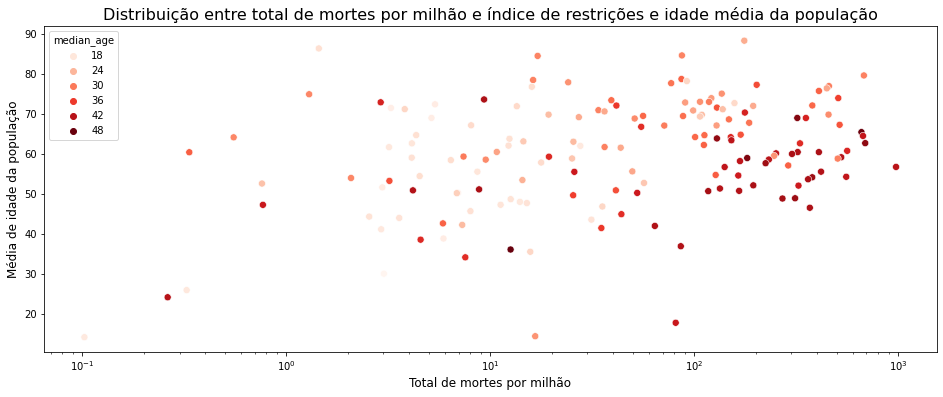

In [21]:
string_index = df[['stringency_index', 'location', 'total_deaths_per_million', 'median_age', 'population']].groupby(by='location').mean().sort_values(by= 'stringency_index',ascending=False)

#scatter plot relação entre - restrições, mortes e média da idade da população
fig, ax = plt.subplots(figsize=(16,6))
ax.set_title('Distribuição entre total de mortes por milhão e índice de restrições e idade média da população', fontsize = 16)
ax.set_xlabel('Total de mortes por milhão', fontsize =12)
ax.set_ylabel('Média de idade da população', fontsize =12)
ax.set_xscale("log")

sns.scatterplot(x='total_deaths_per_million', y='stringency_index', data = string_index, palette='Reds', ax=ax, hue='median_age', s=50);


Não conseguimos detectar uma clara relação entre a rigidez das medidas e a quantidade de morte por milhão no país. Por outro lado, podemos ver uma clara distribuição de países com a população com uma média de idade maior tendo uma maior quantidade de mortes por milhão de habitantes.

No final de 2020 tivemos o ínicio da vacinação ao redor do mundo, quais os países possuem a maior porcentagem de vacinados em sua população?

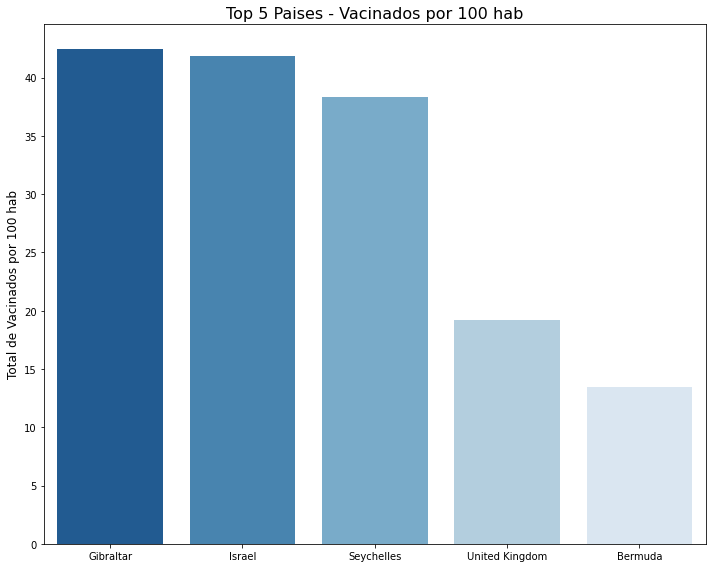

In [22]:
#top 5 
top5_vacinados = df.loc[(df['continent'].notnull()) & (df.date == '2021-02-09')].sort_values(by='people_vaccinated_per_hundred', ascending=False)[:5]

#definir figura
fig, ax = plt.subplots(figsize=(10,8))

#dados do gráfico
sns.barplot(x='location', y='people_vaccinated_per_hundred', data = top5_vacinados, ax=ax, palette='Blues_r');

#configuração do gráfico
ax.set_title('Top 5 Paises - Vacinados por 100 hab',fontsize=16)
ax.set_xlabel ('')
ax.set_ylabel('Total de Vacinados por 100 hab', fontsize=12)

plt.tight_layout()
fig.savefig('Top5 vacinado', dpi=200)

A maioria dos países que estão com grandes quantidades de vacinados são países com uma pequena população, como por exemplo Gibraltar, que lidera o ranking com mais de 40% de sua população vacinada. Porém, o país só possui 33 mil habitantes.

Agora, vamos analisar o cenário brasileiro.

## Análise do Brasil



Vamos separar os dados referentes ao Brasil no nosso conjunto de dados. No Brasil há diversas polêmicas em relação aos dados da Covid-19. Apesar disso, vamos  

In [23]:
df_br = df.loc[df.location == "Brazil"].copy()

In [24]:
df_br.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
8872,BRA,South America,Brazil,2020-02-26,1.0,1.0,NaN,NaN,NaN,NaN,0.005,0.005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765
8873,BRA,South America,Brazil,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.005,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765
8874,BRA,South America,Brazil,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.005,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765
8875,BRA,South America,Brazil,2020-02-29,2.0,1.0,NaN,NaN,NaN,NaN,0.009,0.005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765
8876,BRA,South America,Brazil,2020-03-01,2.0,0.0,NaN,NaN,NaN,NaN,0.009,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765


In [25]:
df_br.tail()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
9222,BRA,South America,Brazil,2021-02-10,9659167.0,59602.0,45678.143,234850.0,1330.0,1041.000,45442.199,280.402,214.896,1104.868,6.257,4.897,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4120332.0,4069677.0,50655.0,300125.0,228375.0,1.94,1.91,0.02,1074.0,NaN,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765
9223,BRA,South America,Brazil,2021-02-11,9713909.0,54742.0,45373.714,236201.0,1351.0,1058.000,45699.737,257.537,213.464,1111.223,6.356,4.977,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4406835.0,4326075.0,80760.0,286503.0,190540.0,2.07,2.04,0.04,896.0,NaN,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765
9224,BRA,South America,Brazil,2021-02-12,9765455.0,51546.0,45470.000,237489.0,1288.0,1065.000,45942.238,242.502,213.917,1117.283,6.059,5.010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4696136.0,4586270.0,109866.0,289301.0,231604.0,2.21,2.16,0.05,1090.0,NaN,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765
9225,BRA,South America,Brazil,2021-02-13,9809754.0,44299.0,51798.429,238532.0,1043.0,1214.000,46150.646,208.408,243.689,1122.190,4.907,5.711,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5125206.0,4946738.0,178468.0,429070.0,246260.0,2.41,2.33,0.08,1159.0,NaN,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765
9226,BRA,South America,Brazil,2021-02-14,9834513.0,24759.0,44267.571,239245.0,713.0,1101.571,46267.126,116.480,208.260,1125.544,3.354,5.182,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5236943.0,5042713.0,194230.0,111737.0,240466.0,2.46,2.37,0.09,1131.0,NaN,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765


Agora, vamos verificar qual em qual data foi registrada a primeira morte no Brasil.

In [26]:
df_br.loc[df.new_deaths == df.new_deaths.notna()]

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
8892,BRA,South America,Brazil,2020-03-17,321.0,121.0,41.429,1.0,1.0,0.143,1.51,0.569,0.195,0.005,0.005,0.001,2.37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.87,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765


#### Gráficos Mortes e Casos - Brasil
Para melhor visualização, vamos plotar os gráficos de casos e mortes, também utilizaremos a escala logarítmica para análisar ambos os dados.

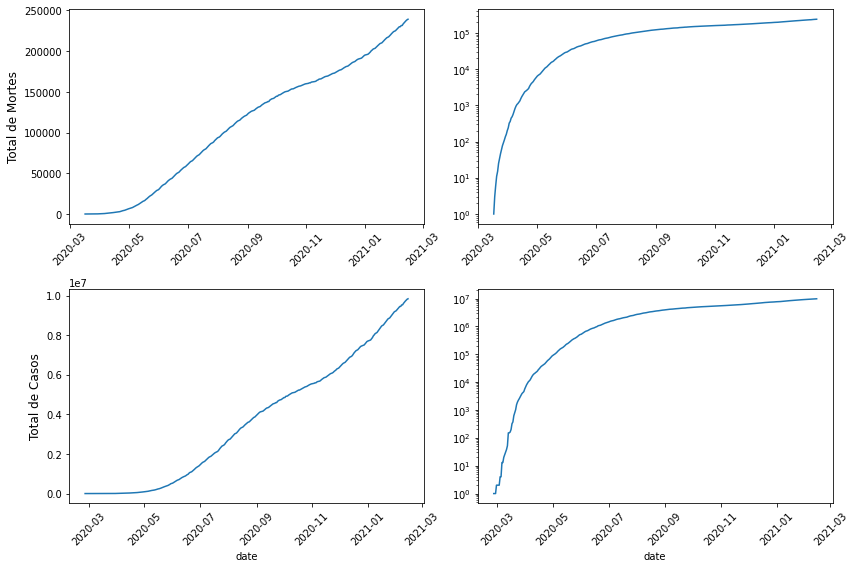

In [27]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(12,8))

#gráfico linear x1 - total_deaths 
sns.lineplot(x='date', y='total_deaths', data=df_br, ax=ax1)
ax1.tick_params(axis='x', labelrotation=45)
ax1.set_xlabel('')
ax1.set_ylabel('Total de Mortes', fontsize=12)


#gráfico log ax2 - total_deaths
sns.lineplot(x='date', y='total_deaths', data=df_br, ax=ax2)
ax2.set_yscale("log")
ax2.tick_params(axis='x', labelrotation=45)
ax2.set_xlabel('')
ax2.set_ylabel('')

#gráfico log ax3 - total_cases
sns.lineplot(x='date', y='total_cases', data=df_br, ax=ax3)
ax3.tick_params(axis='x', labelrotation=45)
ax3.set_ylabel('Total de Casos', fontsize=12)

#gráfico log ax4 - total_cases
sns.lineplot(x='date', y='total_cases', data=df_br, ax=ax4)
ax4.tick_params(axis='x', labelrotation=45)
ax4.set_yscale("log")
ax4.set_ylabel('')


plt.tight_layout()

Vamos ver qual a última entrada em nosso dataset e como estão os números do Brasil no dia da obeservação.

In [28]:
df_br.tail(1)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
9226,BRA,South America,Brazil,2021-02-14,9834513.0,24759.0,44267.571,239245.0,713.0,1101.571,46267.126,116.48,208.26,1125.544,3.354,5.182,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5236943.0,5042713.0,194230.0,111737.0,240466.0,2.46,2.37,0.09,1131.0,NaN,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765


A taxa de transmissão serve como uma estimativa de como a Covid-19 se espalha entre a população do país. Dessa forma, quando esse número é menor ou igual a 1, esperamos uma queda no número de casos. Já, quando maior que 1, esperamos um aumento no número de casos da doença entre a população. Entenda melhor: [Portal da Saúde
](https://coronavirus.saude.mg.gov.br/blog/164-taxa-de-transmissao-covid-19#:~:text=Como%20dito%20anteriormente%2C%20a%20taxa,aumento%20no%20n%C3%BAmero%20de%20casos.)

Veremos se houve uma queda na taxa de transmissão da doença no Brasil e quais foram os meses de maior pico de transmissão. Além disso, veremos também quando foram implantadas as medidas mais rigidas no território nacional.





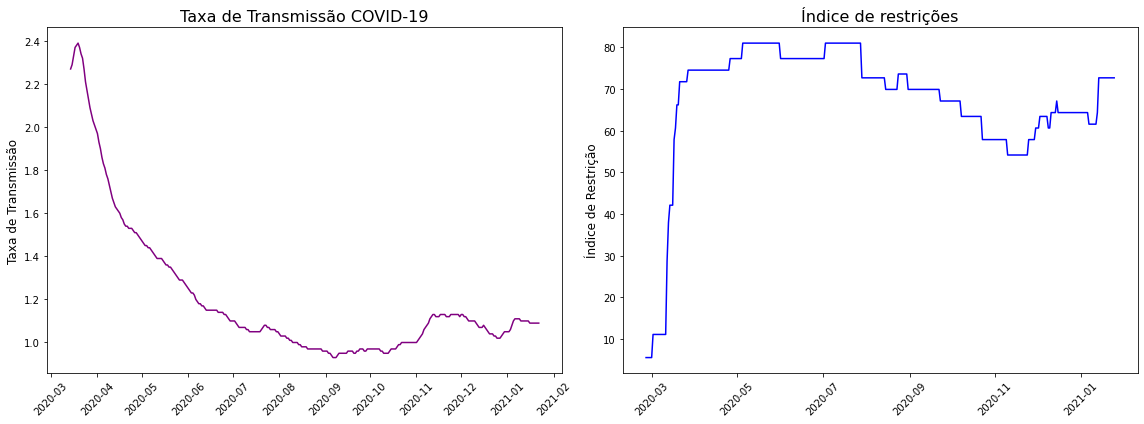

In [31]:
#gráfico 1
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16,6))
sns.lineplot(x='date', y='reproduction_rate', data=df_br, color='purple', ax=ax1)
ax1.tick_params(axis='x', labelrotation=45)
ax1.set_title('Taxa de Transmissão COVID-19', fontsize=16)
ax1.set_ylabel('Taxa de Transmissão', fontsize=12)
ax1.set_xlabel('')

#gráfico 2
sns.lineplot(x='date', y='stringency_index', data=df_br, color='blue', ax=ax2)
ax2.tick_params(axis='x', labelrotation=45)
ax2.set_title('Índice de restrições', fontsize=16)
ax2.set_ylabel('Índice de Restrição', fontsize=12)
ax2.set_xlabel('')

plt.tight_layout()

Vemos que durante os primeiros meses da pandemia no Brasil houve um salto na rigidez das restrições tomadas pelos governantes, durante esse período a taxa de transmissão caiu de 2.4 para 1.2. Após isso, houve um relaxamento nas restrições no país, apartir de Agosto e até o final de 2020, houveram relaxamentos graduais nas restrições. No mês de novembro, o taxa de transmissão começa apresentar uma alta, o que leva os governantes do país a aumentarem a rigidez das medidas.


#### Enfim, vacinados!

No Brasil, a vacinação teve início no dia 18 de janeiro de 2021, começando pelos grupos prioritários da chamada fase 1: trabalhadores de saúde, pessoas que residem em asilos com 60 anos de idade ou mais, pessoas institucionalizadas com deficiência e população indígena em aldeias.

Vamos ver qual a porcentagem da população já foi vacinada.

Número total da população vacinadas: 2.37 %


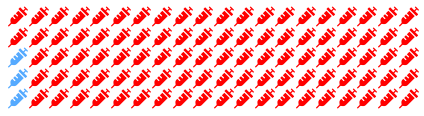

In [36]:
vacinados = df_br.people_vaccinated_per_hundred.max()
n_vacinados = 100 - vacinados

fig = plt.figure(
    FigureClass=Waffle,
    rows=5,
    values=[vacinados, n_vacinados],
    icons='syringe',
    font_size=20,
    colors=["#55AAFF","red"]
)
fig.tight_layout()
fig.savefig('vacina.jpg', dpi = 200)
print ('Número total da população vacinadas:',df_br.people_vaccinated_per_hundred.max(), '%')

Apesar do início da vacinação em janeiro,menos de 3% da população brasileira havia sido vacinada até o dia de hoje.

## Conclusões

Através dessa análise exploratória vimos alguns dados da Covid-19 no Brasil e no mundo. Iniciamos com um comparativo entre diversos países, analisando o impacto da Covid-19 de forma global.
Vimos quais foram os países com maior quantidade de mortes e casos no mundo. 

Além disso, investigamos se há alguma correlação entre o PIB per capita do país e a quantidade de mortes no seu território, e também se há correlação entre idade média da população, restrições adotadas no país e número de mortes nos países. Aqui, vemos que a idade média influencia a quantidade de mortes atribuídas à Covid-19.

Vimos também que alguns países estão muito avançados em relação a vacinação de seus habitantes, a maioria destes são países de pequeno porte, com populações muito inferiores a do Brasil, por exemplo.

Já em território nacional, tivemos a primeira morte registrada em 17 de março de 2020, uma data que anúnciava o ínicio de um desastre. Hoje, o páis ultrapassa o número de 200 mil mortos e se aproxima de 10 milhões de casos. 

Investigamos como foi a evolução da taxa de transmissão da doença ao logo de 2020 até o presente momento, com seus altos e baixos. Outro ponto analisado foram as restrições implementadas no pais e como elas estão interligadas à supracitada taxa de transmissão do Covid-19 no Brasil. 

Finalizamos com um sopro de esperançã, analisando a Taxa de Vacinação no país, que ainda encontra-se abaixo de 3%, que apesar de baixa, ainda representa um avanço e o ínicio do fim da crise da saúde que hoje vivemos.
